# Class 11: Part 1

NYU Tandon C4SUE @avigailvantu , April 2021

## Working and displaying line and polygon data 
GeoPandas can produce maps pretty quickly, with just a few lines of code. Today will look further into some data types and learn how not only create a map, but also how to control some aspects. In the first section of this class we will look into line data of bike lanes, polygon data (senior safe zones), and point data 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon

Today we will see a few additional ways to work with spatial data on Jupyter. Last session we touched upon transforming data from dataframe into geodataframe. This is a cool way to map and visualize x,y data that comes in CSV files. Today we will load shpfiles into Jupyter. Because this is a geo based data it let's us visualize the data right away.

# NYC Bike Lanes 



In [4]:
#here I am loading the bike lanes data
#note that I am loading all files in the folder, hence I do not specify the data extension (.shp)
bike_lane = gpd.read_file('Bicycle Routes')

In [5]:
bike_lane.head()

allclasses bikedir  boro comments facilitycl  fromstreet ft2facilit  \
0          I       2   5.0     None          I  HYLAN BLVD       None   
1          I       2   5.0     None          I  HYLAN BLVD       None   
2          I       2   5.0     None          I  HYLAN BLVD       None   
3          I       2   5.0     None          I  HYLAN BLVD       None   
4          I       2   5.0     None          I  HYLAN BLVD       None   

  ft_facilit  lanecount onoffst  segmentid  shape_leng  \
0   Greenway        2.0     OFF       53.0  131.771990   
1   Greenway        2.0     OFF       57.0  268.689582   
2   Greenway        2.0     OFF       59.0  420.193253   
3   Greenway        2.0     OFF       61.0  238.242198   
4   Greenway        2.0     OFF       64.0  646.293832   

                           street tf2facilit tf_facilit       tostreet  \
0  CONFERENCE HOUSE PARK GREENWAY       None   Greenway  SWINNERTON ST   
1  CONFERENCE HOUSE PARK GREENWAY       None   Greenway  SWINNERTON ST   
2  CONFERENCE HOUSE PARK GREENWAY       None   Greenway  SWINNERTON ST   
3  CONFERENCE HOUSE PARK GREENWAY       None   Greenway  SWINNERTON ST   
4  CONFERENCE HOUSE PARK GREENWAY       None   Greenway  SWINNERTON ST   

                                            geometry  
0  LINESTRING (-74.24993 40.50088, -74.24969 40.5...  
1  LINESTRING (-74.24916 40.49872, -74.24935 40.4...  
2  LINESTRING (-74.24935 40.49944, -74.24969 40.5...  
3  LINESTRING (-74.25185 40.50281, -74.25177 40.5...  
4  LINESTRING (-74.25133 40.50229, -74.24993 40.5...

Note that we already have a geometry column in the data. This means we can visualize the data right away ----> 

<AxesSubplot:>

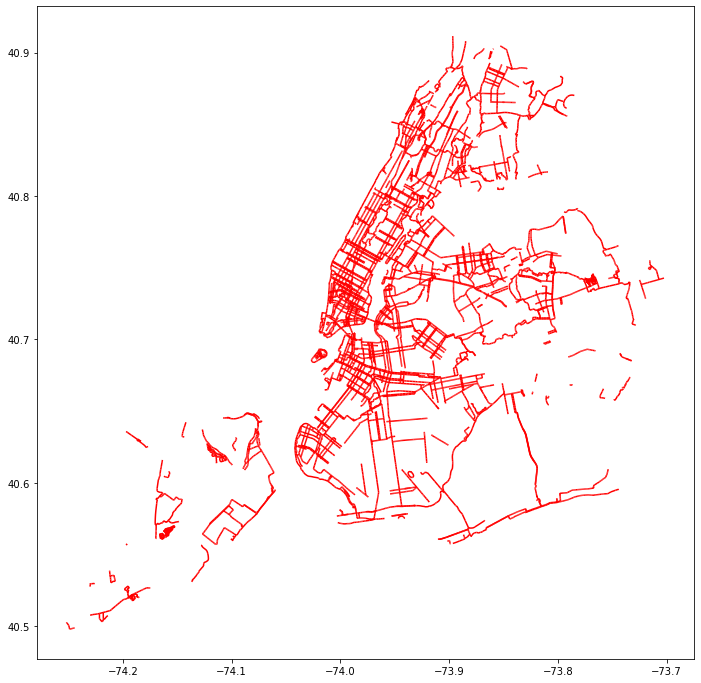

In [6]:


bike_lane.plot( color='red',legend=True,figsize=(12, 12),markersize=0.1)

Now let's check out more functionalities.. 

In [7]:
#knowing what the columns in the data
bike_lane.columns

Index(['allclasses', 'bikedir', 'boro', 'comments', 'facilitycl', 'fromstreet',
       'ft2facilit', 'ft_facilit', 'lanecount', 'onoffst', 'segmentid',
       'shape_leng', 'street', 'tf2facilit', 'tf_facilit', 'tostreet',
       'geometry'],
      dtype='object')

I now want to filter the data and display it by the boro column. Note the boro columns contains numeric values (1-5), and not the actual name. Let's check it out: 

In [8]:
bike_lane['boro']

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
19870    2.0
19871    2.0
19872    2.0
19873    2.0
19874    2.0
Name: boro, Length: 19875, dtype: float64

# Working with the NYC boro codes:

These are the numeric code--borough names. 

1. Manhattan (New York County)
2. Bronx (Bronx County)
3. Brooklyn (Kings County)
4. Queens (Queens County)
5. Staten Island (Richmond County)

In [9]:
#let's filter to only have Manhattan's bike lanes: 

bike_lane[bike_lane['boro']==1].head(3)

allclasses bikedir  boro                     comments facilitycl  \
31      II,III       2   1.0  limited access road (parks)         II   
549          I       2   1.0                         None          I   
550          I       2   1.0                         None          I   

                    fromstreet ft2facilit ft_facilit  lanecount onoffst  \
31                     W 79 ST       None   Curbside        2.0     OFF   
549  GOVERNORS ISLAND GREENWAY       None   Greenway        2.0     OFF   
550  GOVERNORS ISLAND GREENWAY       None   Greenway        2.0     OFF   

     segmentid  shape_leng                     street tf2facilit tf_facilit  \
31      2416.0  440.773031    79 ST NORTH ACCESS RAMP       None   Sharrows   
549    17971.0  249.343238  GOVERNORS ISLAND GREENWAY       None   Greenway   
550    17975.0  291.379429  GOVERNORS ISLAND GREENWAY       None   Greenway   

                               tostreet  \
31   HUDSON RIVER GREENWAY 79TH ST LINK   
549           GOVERNORS ISLAND GREENWAY   
550           GOVERNORS ISLAND GREENWAY   

                                              geometry  
31   LINESTRING (-74.19697 40.55756, -74.19602 40.5...  
549  LINESTRING (-74.02114 40.68514, -74.02191 40.6...  
550  LINESTRING (-74.02024 40.68555, -74.02114 40.6...

In [10]:
len(bike_lane[bike_lane['boro']==1])

5396

We get only bike lanes that are inside Manhattan, there are a total of 5266 of them!

# Filter data to plot one borough at time

This feature is extremely useful to narrow down the map scope, but it requires having categories in the data to work with. Luckily for us the bike lane data comes with the boro code so this is all pretty straight forward. If this was not imidiatly available to us we could have merge with the borough layer for example (we will see how to marge geo data frames in the 2dn section of this class). 

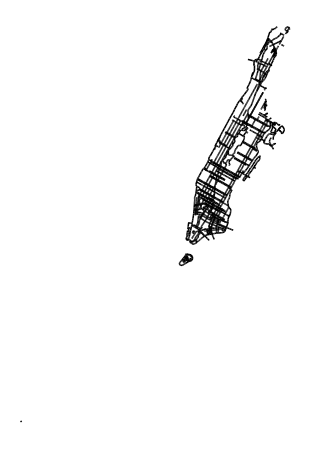

In [17]:
#now let's plot them: 

bike_lane[bike_lane['boro']==1].plot(color='k',figsize=(10,8))
plt.axis('off')
plt.show()

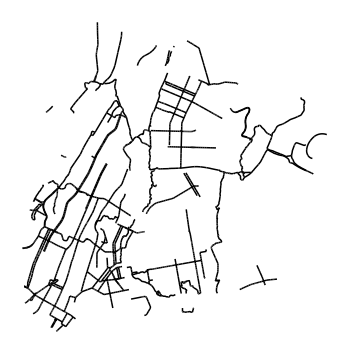

In [15]:
#plot the Bronx bike lanes

bike_lane[bike_lane['boro']==2].plot(color='k',figsize=(6,7))
plt.axis('off')
plt.show()

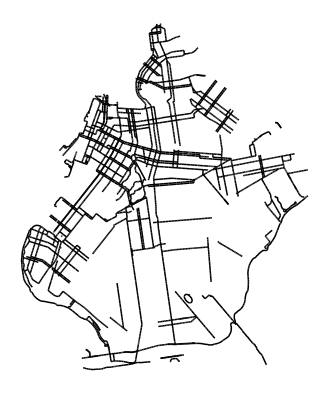

In [18]:
#plot bike lanes for Brooklyn only 
bike_lane[bike_lane['boro']==3].plot(figsize=(8, 7),color='k')
plt.axis('off')
plt.show()

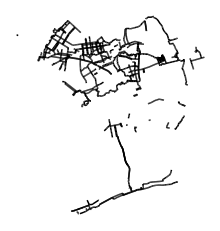

In [19]:
#plot Queens only: 
bike_lane[bike_lane['boro']==4].plot(color='k')
plt.axis('off')
plt.show()

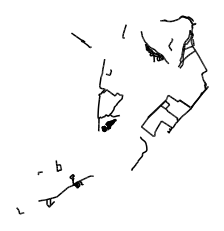

In [20]:
#and finaly, plot Staten Island 
bike_lane[bike_lane['boro']==5].plot(color='k')
plt.axis('off')
plt.show()

In [21]:
# count number of bike lanes per boro :

print ('Manhattan # of bike lanes',len(bike_lane[bike_lane['boro']==1]))
print ('Staten Island # of bike lanes',len(bike_lane[bike_lane['boro']==5]))
print ('Bronx # of bike lanes',len(bike_lane[bike_lane['boro']==2]))
print ('Brooklyn # of bike lanes',len(bike_lane[bike_lane['boro']==3]))
print ('Queens # of bike lanes',len(bike_lane[bike_lane['boro']==4]))
print ('Staten Island # of bike lanes',len(bike_lane[bike_lane['boro']==5]))

Manhattan # of bike lanes 5396
Staten Island # of bike lanes 1092
Bronx # of bike lanes 2977
Brooklyn # of bike lanes 5696
Queens # of bike lanes 4714
Staten Island # of bike lanes 1092


## Types of bikelanes

As we will see soon ,the NYC bike lane data can get us the specifics of the each bike lane type. Let's look into two columns to learn more about the types of bike lanes: 
1. ft_facilit
2. tf_facilit

In [22]:

bike_lane.ft_facilit.unique()

array(['Greenway', 'Standard', 'Curbside', 'Sharrows', 'Sidewalk',
       'Protected Path', 'Signed Route', None, 'Bike-Friendly Parking',
       'Buffered Conventional', 'Boardwalk', 'Buffered', 'Ped Plaza',
       'Dirt Trail', 'Link', '<Null>', 'Dirt Path'], dtype=object)

In [23]:

bike_lane.tf_facilit.unique()

array(['Greenway', 'Standard', 'Curbside', 'Sharrows', 'Sidewalk',
       'Protected Path', None, 'Signed Route', 'Buffered Conventional',
       'Bike-Friendly Parking', 'Boardwalk', 'Sharrows/Standard',
       'Buffered', 'Curbside/Sharrows', 'Standard/Sharrows', 'Ped Plaza',
       'Sharrows/Protected Path', 'Dirt Trail', 'Velodrome', 'Link',
       'Dirt Path'], dtype=object)

They both seem to have mostly the same categories, when ft_facilit seem to have slightly simpler. But the tf_facilit gives us more intresting details that's why I chose it. 

Let's plot the data so that it is diplayed only 

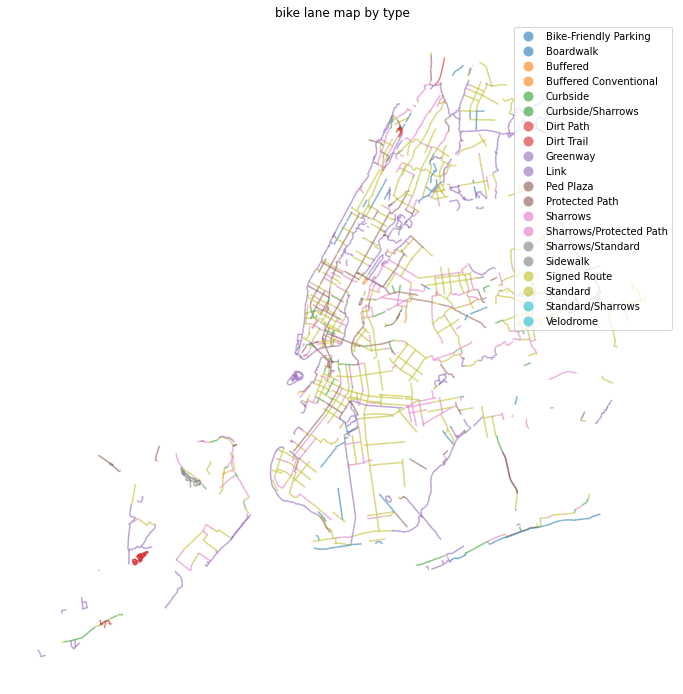

In [24]:
ax = bike_lane.plot(column='tf_facilit',legend=True,figsize=(12, 20), alpha = 0.6,markersize=2)

plt.title('bike lane map by type')

plt.axis('off')


plt.show()

In [25]:
#let's see the number of rows per unique value of bike path type: 
bike_lane['tf_facilit'].value_counts()

Standard                   5227
Sharrows                   2571
Greenway                   2362
Protected Path             2088
Curbside                    634
Bike-Friendly Parking       529
Signed Route                432
Sidewalk                    347
Boardwalk                   159
Dirt Trail                   64
Buffered Conventional        41
Buffered                     37
Dirt Path                    36
Ped Plaza                    13
Link                          8
Velodrome                     3
Curbside/Sharrows             2
Sharrows/Standard             2
Sharrows/Protected Path       1
Standard/Sharrows             1
Name: tf_facilit, dtype: int64

In [26]:
# plot only MN by bike lane type:

bike_laneMN = bike_lane[bike_lane['boro']==1]

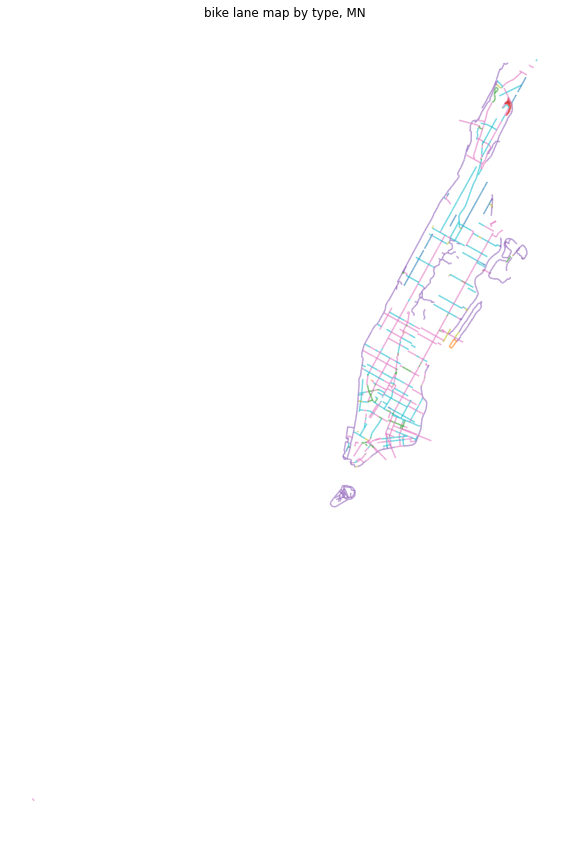

In [27]:
labels = bike_laneMN.tf_facilit

ax = bike_laneMN.plot(column='tf_facilit', figsize=(10, 15), alpha = 0.6,markersize=2)
#ax.legend()
plt.title('bike lane map by type, MN')

plt.axis('off')
#plt.xlim(500000,588000)
#plt.ylim(4200000,4520000)
plt.show()

## Ploygon data: Senior Priority Zones: 



In [28]:
safe_streeets = gpd.read_file("VZV_Safe Streets for Seniors")

In [29]:
safe_streeets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
safe_streeets.head()

name    shape_area    shape_leng  \
0             Astoria  8.306479e+06  14763.582784   
1          Bath Beach  1.187964e+07  15515.138903   
2           Bay Ridge  1.475626e+07  21468.007297   
3  Bedford Stuyvesant  4.613148e+07  27438.609830   
4         Bensonhurst  2.399853e+07  23653.773218   

                                            geometry  
0  POLYGON ((-73.91899 40.76577, -73.91978 40.766...  
1  POLYGON ((-73.99154 40.59039, -73.99161 40.590...  
2  POLYGON ((-74.03382 40.61459, -74.03454 40.614...  
3  POLYGON ((-73.92864 40.69324, -73.92804 40.692...  
4  POLYGON ((-73.99015 40.59971, -73.99086 40.600...

In [31]:
#what are the polygons area? 
safe_streeets.geometry.area.head()

<ipython-input-31-932e6bb44835>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  safe_streeets.geometry.area.head()


0    0.000082
1    0.000117
2    0.000146
3    0.000457
4    0.000237
dtype: float64

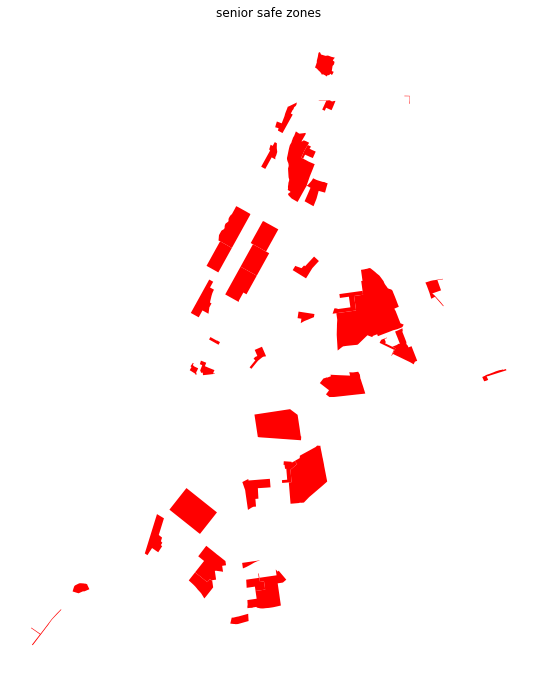

In [32]:

safe_streeets.plot(color='red',figsize=(12, 12),markersize=0.1)
plt.axis('off')
plt.title('senior safe zones')

plt.show()

## Add a point layer: senior centers 

Here we will add a layer of senior centers that the DOT works with. We will try to overlay one with the senior safe zone to see how many senior centers fall inside the safety zones. 

In [33]:
#load the shapfile
senior_centers = gpd.read_file("VZV_Senior Centers")

In [34]:
#what are the columns in the data
senior_centers.columns

Index(['activity', 'event_date', 'lat', 'long', 'site_serve', 'geometry'], dtype='object')

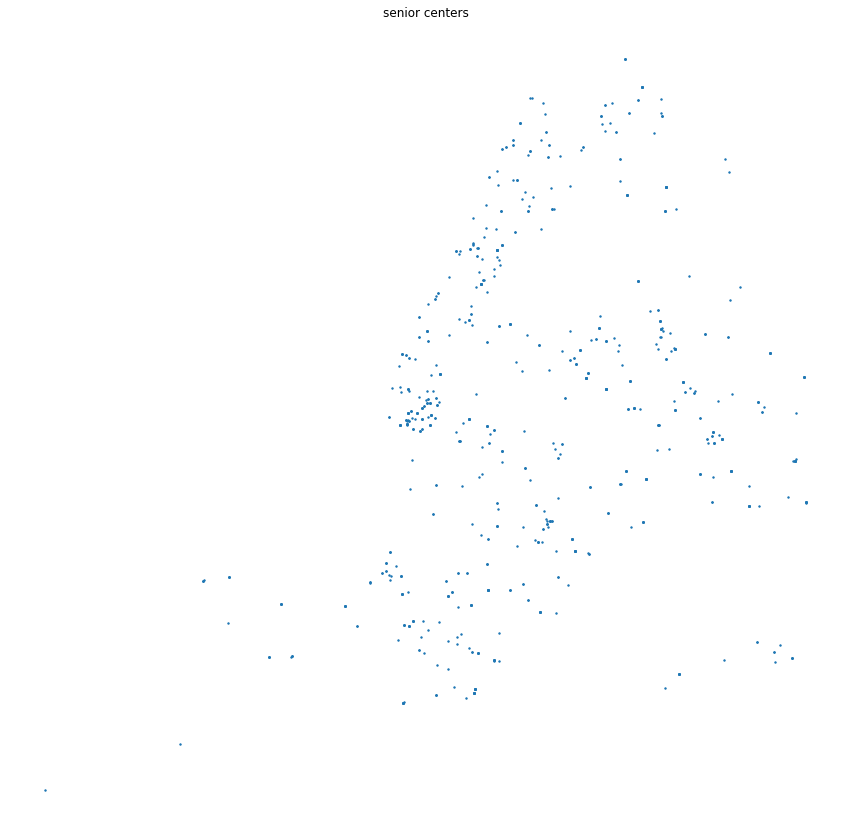

In [35]:
senior_centers.plot(figsize=(15, 15),legend=True,markersize=2)
plt.axis('off')
plt.title('senior centers')
plt.show()

# Overlay multiple layers on Pyplot: 

Can we intersect safe zones and senior centers?

In [36]:
#what is the projection of senior safe zones?
safe_streeets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
#what is the projection of senior centers?
senior_centers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Both look the same so we should be good to go with overlaying both. 

(-74.26504011945596, -73.70740009178658, 40.510574673913105, 40.91661409471997)

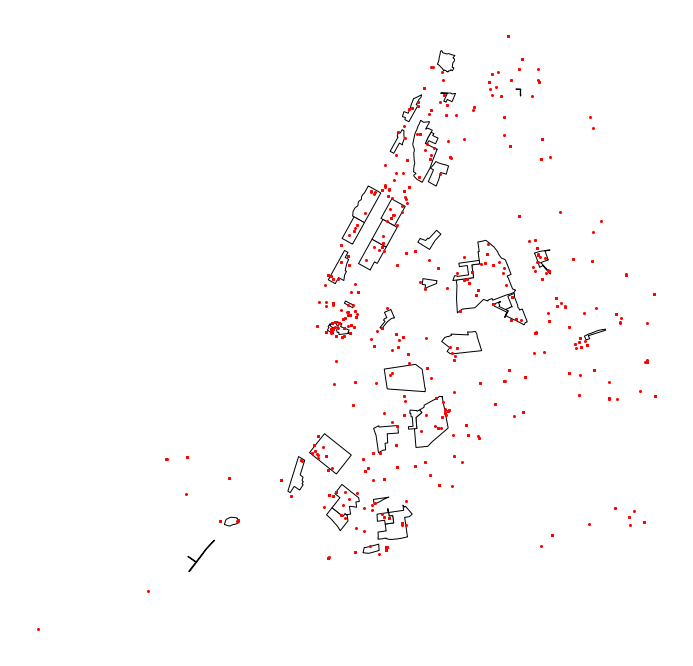

In [38]:
#first we need to set up the layer that is going to be used 
base = safe_streeets.plot(color='white',legend=True,figsize=(20, 12), edgecolor='black')
#now add the senior centers layer: 
senior_centers.plot(ax=base, marker='o', color='red', markersize=4);


plt.axis('off')

## Bonus: Add map background

In [42]:
import contextily as ctx

In [43]:
bike_lane = bike_lane.to_crs(epsg=3857)

In [ ]:
# from:https://share.cocalc.com/share/56cef78b3fda5e0338c2da71b222e6b275a9193e/contextily.ipynb?viewer=share 

In [44]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    
    ax.axis((xmin, xmax, ymin, ymax))
    
    

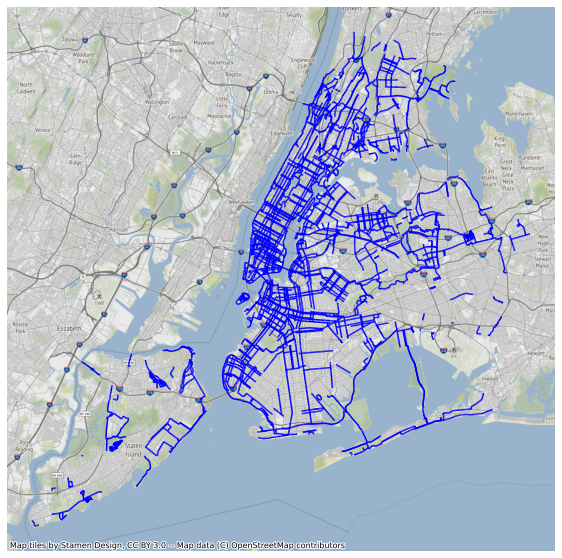

In [45]:
ax = bike_lane.plot(figsize=(10, 10), edgecolor='b')
ctx.add_basemap(ax, zoom=12)
ax.set_axis_off()

## Class assignment

Using any publilcy available data, display the proximity of bike lanes to two important city amenities of your choice. Choose only two boroughs from the city 5 boroughs to display both bike lanes and the amenities for only those two boroughs. Compare the proximity between both selected boroughs. 

What are some of the conclusions that come to mind when thinking about how bike lanes are distributed across the city boroughs? Given your analysis, are there any areas that seem to be lacking bike lanes? If so, where?









### Public school data

In [46]:
# import data
public_school = gpd.read_file("Public_School_Locations")

In [81]:
public_school.head()

ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS STATE_CODE    ZIP               PRINCIPAL  \
0           309 47 STREET         NY  11220        Jennifer Eusanio   
1     655 PARKSIDE AVENUE         NY  11226        ADRIENNE SPENCER   
2  345 VAN SICKLEN STREET         NY  11223           Janet Ndzibah   
3             99 AVENUE P         NY  11204  Denise Sandra Levinsky   
4   1855 STILLWELL AVENUE         NY  11223       KRISTINE MUSTILLO   

        PRIN_PH           FAX                            GRADES      City  \
0  718-567-7661  718-567-9771           PK,0K,01,02,03,04,05,SE  BROOKLYN   
1  718-462-6992  718-284-7717                       06,07,08,SE  BROOKLYN   
2  718-449-5050  718-449-3047  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN   
3  718-236-1344  718-236-2397                       06,07,08,SE  BROOKLYN   
4  718-372-7393  718-372-3842           PK,0K,01,02,03,04,05,SE  BROOKLYN   

                        geometry  
0  POINT (980985.054 175780.759)  
1  POINT (997785.136 178431.911)  
2  POINT (991224.983 156323.361)  
3  POINT (988439.681 160709.993)  
4  POINT (988205.073 158329.591)

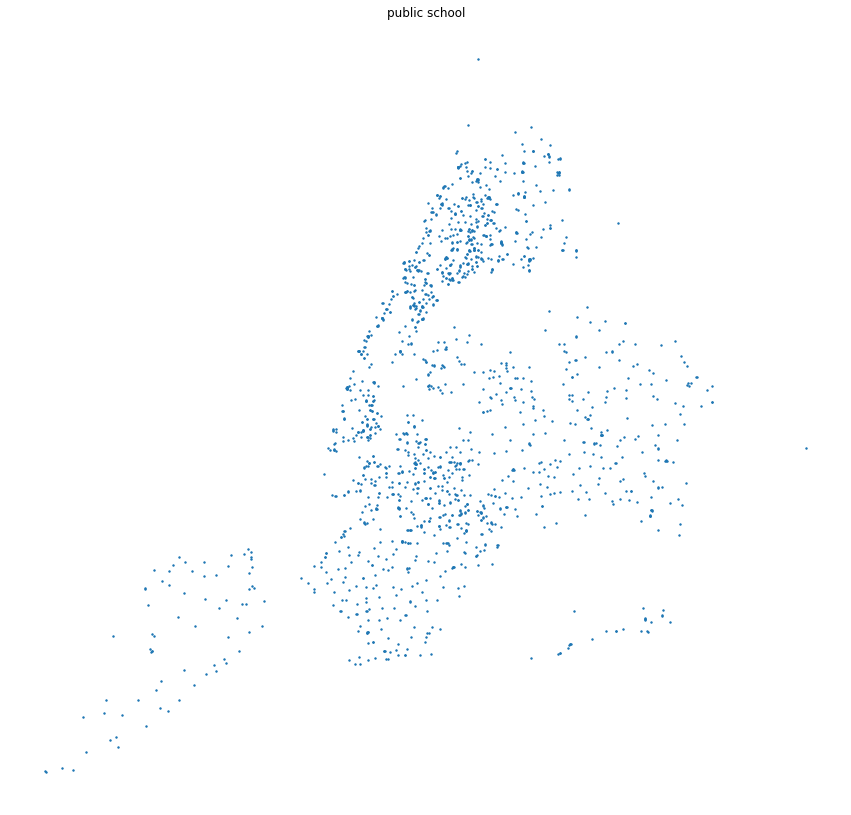

In [57]:
# show map of all the public schools in New York City
public_school.plot(figsize=(15, 15),legend=True,markersize=2)
plt.axis('off')
plt.title('public school')
plt.show()

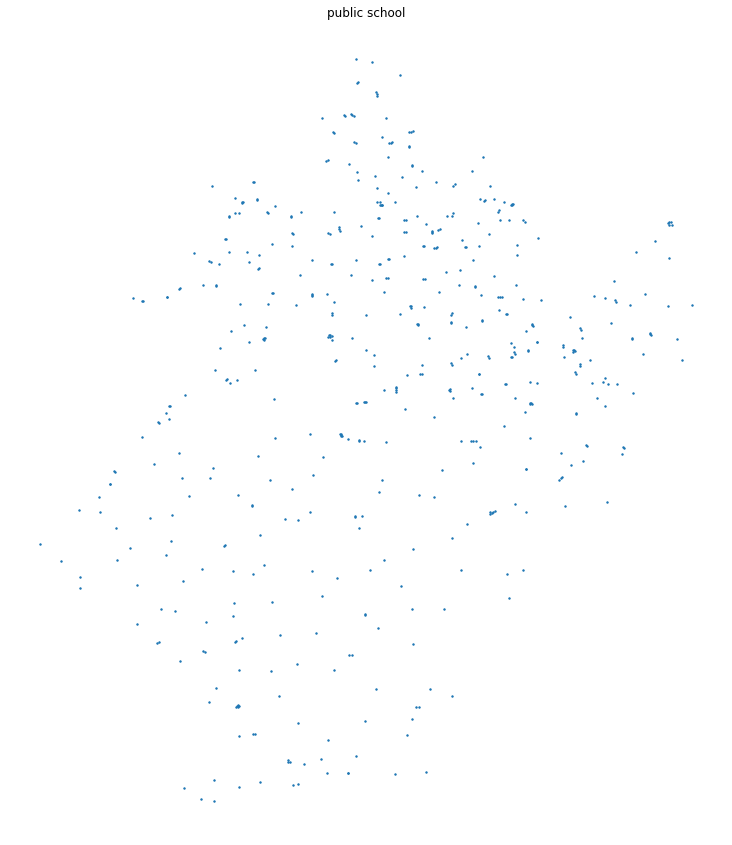

In [76]:
# show map of all the public schools in Brooklyn
public_school[public_school['City']=="BROOKLYN"].plot(figsize=(15, 15),legend=True,markersize=2)
plt.axis('off')
plt.title('public school')
plt.show()

In [59]:
# check the coordinate system of public school
public_school.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [60]:
# check the coordinate system of bike lane data set
bike_lane.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
# change the coordinate system of bike lane data set
bike_lane = bike_lane.to_crs(epsg=2263)

(970109.6727897972, 1026010.4747018868, 144407.8418444839, 211670.80830253457)

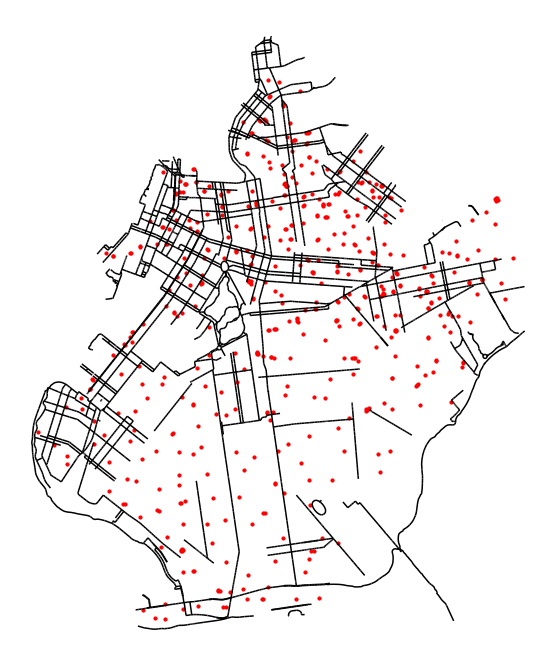

In [78]:
# Brooklyn Public School
base = bike_lane[bike_lane['boro']==3].plot(color='black',legend=True,figsize=(20, 12), edgecolor='black')
brooklyn_school = public_school[public_school['City']=="BROOKLYN"]
brooklyn_school.plot(ax=base, marker='o', color='red', markersize=10);


plt.axis('off')

From the map above, we can see that almost all bike lanes have public schools in the surrounding in Brooklyn but as the locations of the public school are quite scattered, some of them don't have bike lanes near them in lower brooklyn. Probably because they are elementary or middle schools that students usually do not use bikes to get to the school. 

(981498.7562287757, 1070766.571295156, 138109.6861343666, 232251.24317797224)

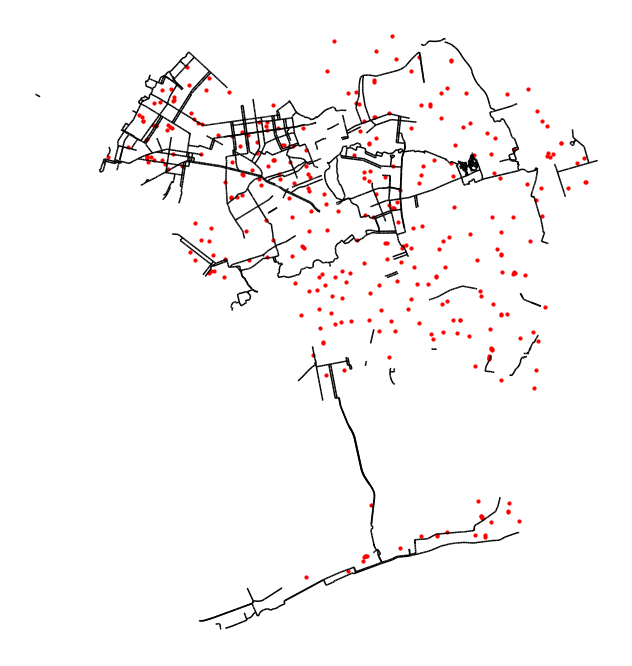

In [80]:
#Queens Public School
base = bike_lane[bike_lane['boro']==4].plot(color='black',legend=True,figsize=(20, 12), edgecolor='black')
queens_school = public_school[public_school['City']=="QUEENS"]
queens_school.plot(ax=base, marker='o', color='red', markersize=10);


plt.axis('off')

From the map above, we can see that queens have less bike lanes and public schools than brooklyn and there are more schools that have no bike lanes near than in brooklyn, especially in lower queens. May be because they are little far from the downtown that have less infrastructures. 

### Open Space (Parks) Data

In [96]:
parks = gpd.read_file("Open Space (Parks)")

In [97]:
parks.head()

feat_code            landuse                   park_name parknum  \
0     4910.0     Community Park        Commodore Barry Park    B021   
1     4980.0  Neighborhood Park       Pierrepont Playground    B222   
2     4980.0  Neighborhood Park            Cobble Hill Park    B326   
3     4980.0     Community Park        Commodore Barry Park    B021   
4     4980.0     Triangle/Plaza  Brooklyn Heights Promenade  B223DG   

      shape_area   shape_leng     source_id     status  sub_code system  \
0   41539.801363   829.420107  2.149100e+10    Updated  491050.0   None   
1   21960.494920   607.555193  2.149800e+10  Unchanged  498000.0   None   
2   28079.076265   784.421990  2.149800e+10  Unchanged  498000.0   None   
3  438416.114511  2672.710150  2.149800e+10  Unchanged  498000.0   None   
4   14465.699799  1376.106398  2.149800e+10  Unchanged  498000.0   None   

                                            geometry  
0  POLYGON ((-73.97922 40.69800, -73.97925 40.697...  
1  POLYGON ((-73.99732 40.69601, -73.99732 40.696...  
2  POLYGON ((-73.99557 40.68793, -73.99557 40.687...  
3  POLYGON ((-73.97747 40.69651, -73.97746 40.696...  
4  POLYGON ((-73.99747 40.69692, -73.99766 40.696...

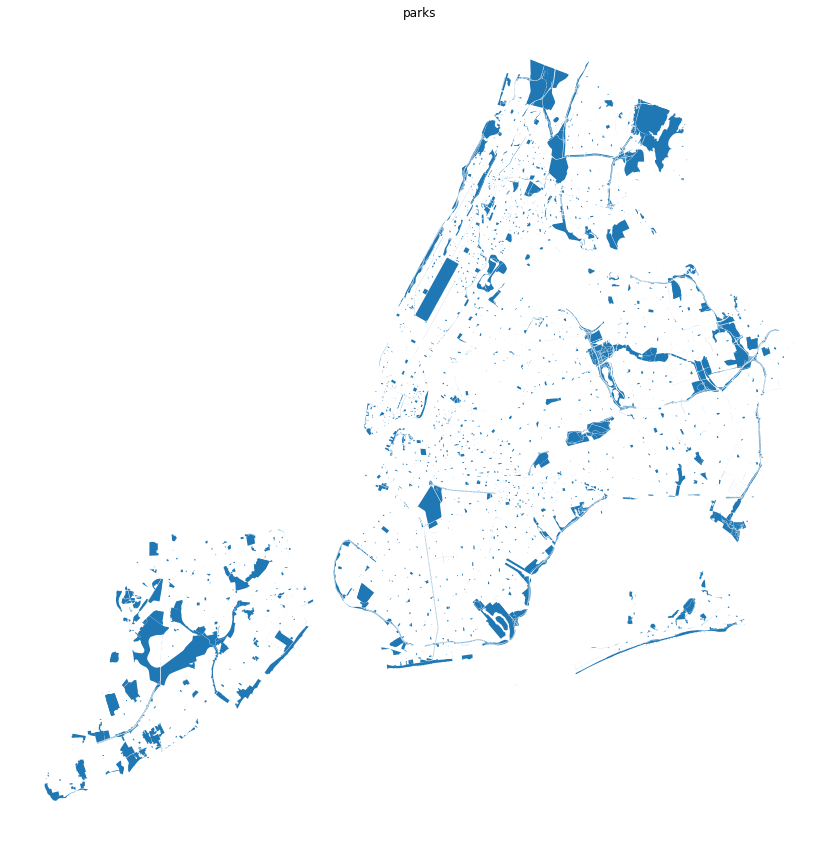

In [85]:
parks.plot(figsize=(15, 15),legend=True,markersize=2)
plt.axis('off')
plt.title('parks')
plt.show()

In [84]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [86]:
bike_lane = bike_lane.to_crs(epsg=4326)

(-74.28304659840941, -73.67414597947594, 40.47536353404412, 40.93218184298859)

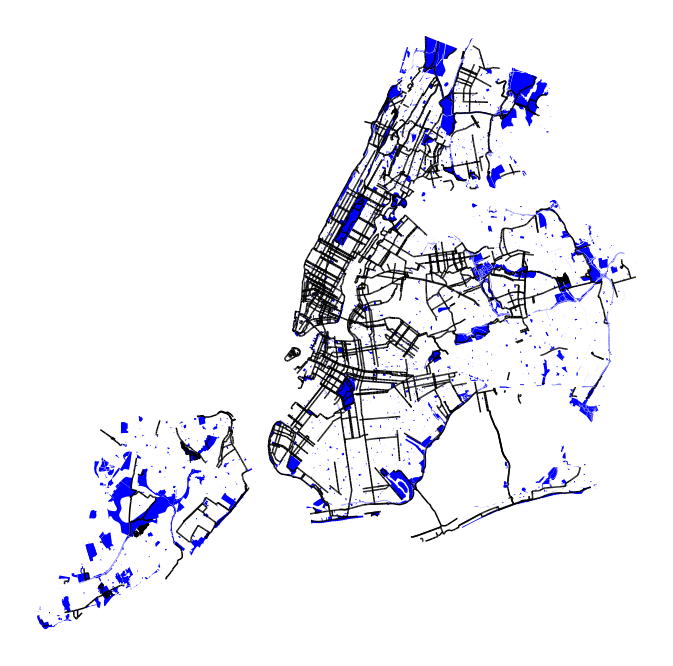

In [88]:
base = bike_lane.plot(color='black',legend=True,figsize=(20, 12), edgecolor='black')
parks.plot(ax=base, color='blue', markersize=10);


plt.axis('off')

Since the data set doesn't have attribute of parks for each borough, the map shows all the parks in New York City. As we can see in the map above, parks that have larger areas have bike parks near them and even in the parks such as central parks and prospect parks. For smaller parks, there are less bike lanes especially in lower queens and brooklyn. One thing to notice that there are less bike lanes in Staten Island even though the parks have larger areas. 